<center><h1>Analyzing Baltimore Public Transit affects on High School Students Attendence and Success</h1></center>

<center><h3>Spring 2025 Data Science Project</h3></center>
Rabbera Hordoffa, Ciana Gomes, Shreyaj Bhandari, Vishal Budamala, Abhilash Shankar, Arsema Tegegne

### Contributions
- Rabbera: I did the Introduction as well as the data collection, and preprocessing.
- Ciana: I did the Anova Test and rewrote checkpoint 2 as a tutorial for the Data Exploration.
- Shreyaj: I did the Mann-Whitney U test, I did the linear regression code, and I wrote the explanation for the Baltimore-City-Crime dataset
- Vishal: I did Chi-squared test and analyzed the output
- Abhilash: Mann-Whitney U test, finalized submissions to fixs bugs/errors to ensure everything was working
- Arsema: I did pearson and I wrote the conclusion

## Table of Contents
- Introduction
- Data Preprocessing
- Data Exploration and Summary statistics
- Model Implementation
- Conclusion

## Introduction



This tutorial is a way for beginners to understand data science and how to use it in real-world problems. In this case we are looking at Baltimore City Schools that do not provide school buses to their students. Instead, students are expected to rely on the city's public transportation system. This project investigates transit accessibility for students, as well as the safety issues surrounding it—and how it affect's high school students' education.


The central questions:


- Does limited access to public transportation increase the likelihood of students being absent or late?
- Are students in more concentrated, crime-related areas more likely to miss school?
- How does transportation and safety factor into predicting attendance?


These questions are necessary to understand how school attendance impacts students' academic success, graduation rates, and future opportunities. Students missing school because of extenuating circumstances—such as unreliable transportation—is an issue the city must address and can potentially solve. This points to deeper equity issues in city planning and education. By identifying which factors most affect student attendance, this project aims to provide insight into those disparities.



## Data Collection


The first step in the Data Cycle is to find the data needed for our topic. We collect data from various sources that can help us achieve an answer for our problem.

This project uses several public available datasets covering Baltimore City school attendence, public transportation usage, bus stop locations, and neighborhood crime.

<ul>
  <li><strong>Baltimore Open Data Portal:</strong>
    <ul>
      <li><a href="https://www.baltimorepolice.org/crime-stats">Baltimore-City-Crime.csv</a>: Crime incidents with timestamps, type of crime, and locations</li>
      <li><a href="https://opendata.maryland.gov/Transportation/MD-iMAP-Maryland-Transit-MTA-Bus-Lines/xmhu-zntx/about_data">Bus_Stops.csv</a>: Locations and ridership data for each bus stop</li>
      <li><a href="https://data.baltimorecity.gov/maps/f7aa9d269dda476dac1743e500ed795f/about">Students-Missing-Class.csv</a>: Absence rate of high school students by grade level and area</li>
    </ul>
  </li>
  <li><a href="https://data.baltimorecity.gov/maps/dbc98e87a3a04103b2cb0f7b5af25d42/about">Use-Public-Transportation.csv</a>: Transit use by neighborhood region (CSA)</li>
  <li><a href="https://data.baltimorecity.gov/maps/f7aa9d269dda476dac1743e500ed795f/about">Bus-Performance.csv</a>: Arrival times of the MTA buses</li>
</ul>

There are lots of open source dataset on the internet and these resources make it easy to help you find the data needed for analysis

Here is a great place to check some datasets out:

https://www.kaggle.com/

https://data.gov/

## Data Preprocessing

After collecting all our data the next thing we need to do is process it or cleaning our data. This just means we load our data and check what we do or don't want to use and also making the data easier to read. To clean our data we will be using various python libraries which is code packages already written for us instead having to code everything from scratch.

The following standard libraries we will be using in this tutorial

- pandas: Organizes and cleans our data
- numpy: Used for arthmetic and math simplfication
- matplotlib and seaborn: Allows us to visualize our data into charts
- scipy.stats: Helps us with the statistics

There are dozens of libraries that can used: https://docs.python.org/3/library/index.html


In [32]:
# Standard Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

The first dataset we are cleaning is Bus_stops.csv which includes locations of bus stops, the stop name, ridership statistics of how many riders get on and off at each stop.

Our data is a csv (common seperated file) file, in order to access it we have to load it into a DataFrame. To do this we use the pandas function .read_csv which will retrieve the data from the file and form it into the data frame we want.

Better explained here: https://www.geeksforgeeks.org/python-read-csv-using-pandas-read_csv/

Earlier we used the term DataFrames, but what is it?

A DataFrame is basically a spreadsheet, it is derived from the pandas library. Just like an Excel sheet a dataframe has rows and columns. And it allows us to easily sort, filter, and clean our data. This makes data easy to work with and sets the foundation of processing.


After creating our dataframes we sifted through the data and found fields that weren't necessary like mapping visuals so we removed those columns. They aren't necessary as all we want from this data is the locations of the bus stops and how many riders on average get on the bus at that stop.

Next we checked for any missing data in the dataset using dropna() which removes all the rows with null values from the dataframe. Removing null values helps us reduce error and provide better results when exploring our data.

For more pandas dataframe function look at W3Schools:

https://www.w3schools.com/python/pandas/ref_df_dropna.asp

We want to use this dataset to map out public transit across the different neighborhoods, and calculate the number of bus stops. Then the proximity of those stops to nearby crime.

In [33]:
bus_stops_df = pd.read_csv('Bus_Stops.csv')

bus_stops_cleaned = bus_stops_df.dropna()

remove_col = [
    'Distributi', 'Mode', 'GlobalID', 'stop_id',
    'Shape__Length', 'Shape__Area'
]
bus_stops_cleaned = bus_stops_cleaned.drop(columns=[col for col in remove_col if col in bus_stops_cleaned.columns])
bus_stops_cleaned.head()

,X,Y,OBJECTID,stop_name,Rider_On,Rider_Off,Rider_Tota,Stop_Rider,Routes_Ser,Shelter,County
0,-76.660393,39.350945,1,CYLBURN AVE & GREENSPRING AVE fs wb,201,167,368,250,"94,31,31,91",Yes,Baltimore City
1,-76.663359,39.351545,2,LANIER AVE & SINAI HOSPITAL sb,38,24,62,1727,"94,31,91",No,Baltimore City
2,-76.664492,39.352749,3,LANIER AVE & BELVEDERE AVE nb,147,45,192,594,"94,31,91",No,Baltimore City
3,-76.658233,39.346756,4,YELLOWOOD AVE & FLAX TERR OPP sb,51,61,113,1068,"91,91",No,Baltimore City
4,-76.654797,39.348262,5,TAMARIND RD & SPRINGARDEN DR nb,19,23,43,2161,"91,91",No,Baltimore City


As you can see from the output above after cleaning the Bus_Stops.csv dataset. We see our columns X and Y which are geomapping locations, ObjectID, stop_name, Rider_On, Rider_Off, Roder_Tota, Stop_Rider, Routes_Ser, Shelter, and County. We might not need to use all the columns but it a great start.

If you notice only 5 rows were printed becuase we used the function .head() whcih is a method that only returns the first 5 rows of the dataset, unless specified by a number otherwise.

[W3Schools Head Function](https://www.w3schools.com/python/pandas/ref_df_head.asp#:~:text=The%20head()%20method%20returns,a%20number%20is%20not%20specified.&text=Note%3A%20The%20column%20names%20will,addition%20to%20the%20specified%20rows.)


The next dataset we are cleaning is Bus-Performance.csv contains how well the public bus system performs in Baltimore City over time.
It contains the:
- Percentage of buses on time
- Percentage of buses that are early or late

We follow the same steps as before with some minor differences, and thats because datasets get cleaned differently depending on the format and content.

We cleaned the date column as it was originally a string so we converted it to a datetime object using pd.to_datetime()

More Info on [DateTime](https://www.geeksforgeeks.org/python-pandas-to_datetime/)

The columns "On-Time" , "Early", and "Late" were strings of percentages (i.e. 56%) so we stripped the percentage sign and converted the values into floats.

Lastly replaced any "No service recorded" entries with NaN and then used .dropna() to remove those rows to better clean and simplify the data.

In [34]:
bus_perform_df = pd.read_csv('Bus-Performance.csv')
bus_perform_cleaned = bus_perform_df.copy()
# Making the date to Datetime
bus_perform_cleaned['Date'] = pd.to_datetime(bus_perform_cleaned['Date'], errors='coerce')

# Convert percentage strings to floats
for col in ['On-Time', 'Early', 'Late']:
    bus_perform_cleaned[col] = (
        bus_perform_cleaned[col]
        .replace("No service recorded", np.nan)
        .str.replace('%', '', regex=False)
        .astype(float)
    )
bus_perform_cleaned = bus_perform_cleaned.dropna()
bus_perform_cleaned.head()

,Date,On-Time,Early,Late
0,2020-01-01,78.3,4.3,17.5
1,2020-01-02,77.0,8.2,14.7
2,2020-01-03,73.3,5.5,21.2
3,2020-01-04,71.6,3.7,24.7
4,2020-01-05,78.8,5.1,16.1


As you can see above the Date column is as follows year-month-day, followed by the performance columns with float values

Next to better understand how access to public transportation may affect stduent attendence is to use the Use-Public-Transporation.csv dataset.

This dataset tells us how much public transit is used in different neighborhoods (CSA) over a couple years. Each row shows a percentage of the population that uses the public transit in a given CSA.

We reused some of the steps in cleaning our previous dataset cleaning. First removing unecessary columns that won't be used like 'OBJECTID', 'CSA2010', 'Shape__Area', and 'Shape__Length'. These are typically included for mapping purposes.

Originally, the dataset was in wide format—each column represented a year (e.g., 2018, 2019, 2020, etc.). That format is hard to work with when doing comparisons over time.

So, we used the melt() function to make it easier to group and filter.

More here: https://www.geeksforgeeks.org/python-pandas-melt/

We also fixed the year values because they we stored as strings when we want actual number values so we used .str.extract. Its a pandas string function that pulls parts of a string using regular expression (a.k.a regex).

Want to know more about [.str](https://www.geeksforgeeks.org/python-pandas-series-str-extract/) click.

Lastly we renamed the column to CSA2020 to just CSA for consistancy. And filter the years from 2020 to later because we want the most recent data for more accurate recent findings.

In [35]:
pubtran_df = pd.read_csv('Use-Public-Transportation.csv')
pubtran_df = pubtran_df.drop(columns=['OBJECTID', 'CSA2010', 'Shape__Area', 'Shape__Length'])

pubtran_cleaned = pubtran_df.melt(
    id_vars='CSA2020',
    var_name='Year',
    value_name='Transit_Use_Pct'
)
pubtran_cleaned['Year'] = pubtran_cleaned['Year'].str.extract(r'(\d+)$').astype(int)
pubtran_cleaned['Year'] = pubtran_cleaned['Year'].apply(lambda x: x + 2000 if x < 100 else x)
pubtran_cleaned.rename(columns={'CSA2020': 'CSA'}, inplace=True)

# Want to filter the years to 2020 and after
pubtran_cleaned = pubtran_cleaned[pubtran_cleaned['Year'] >= 2020].reset_index(drop=True)
pubtran_cleaned.head()

,CSA,Year,Transit_Use_Pct
0,Allendale/Irvington/S. Hilton,2020,23.712384
1,Beechfield/Ten Hills/West Hills,2020,10.901771
2,Belair-Edison,2020,22.252163
3,Brooklyn/Curtis Bay/Hawkins Point,2020,17.366533
4,Canton,2020,3.808235


This Baltimore-City-Crime.csv dataset is a dataset that has a lot of important information regarding the crime that occurs in Baltimore City.

There was originally more than 64,000 rows in the dataset, but we wanted to lower the sample size to 5000 since it was still a big enough sample size, but also not so much that it would overwhelm the model.

There were twenty columns in this dataset, but only a select few that we needed: CrimeDateTime, the time and date that the crime occurred; Description, the exact crime that the criminal was charged with; Weapon, either no weapon was used, or otherwise the weapon used in the crime is specified; Latitude and Longitude, two categories which gave the exact coordinate location of the crime.


In [36]:
# This is a very large dataset so I am only inspecting the first 5000 rows just so everyone can see the output
crime_df = pd.read_csv('Baltimore-City-Crime.csv', nrows=5000)

crime_df["CrimeDateTime"] = pd.to_datetime(
    crime_df["CrimeDateTime"],
    format="%m/%d/%Y %I:%M:%S %p",
    errors="coerce"
)

crime_df = crime_df.drop(columns=["Inside_Outside", "New_District"])
crime_df['Weapon'] = crime_df['Weapon'].fillna('NONE') # Assuming that NaN values under "Weapons" column means no weapon was used
crime_df['Latitude'] = crime_df['Latitude'].dropna()
crime_df['Longitude'] = crime_df['Longitude'].dropna()
crime_df['Latitude'] = crime_df[crime_df['Latitude'] != 0.0]['Latitude']
crime_df['Longitude'] = crime_df[crime_df['Longitude'] != 0.0]['Longitude']
crime_df

,RowID,CCNumber,CrimeDateTime,CrimeCode,Description,Weapon,Post,Gender,Age,Race,...,Location,Old_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents,x,y
0,1,14I10336,2014-08-29 12:00:00,5A,BURGLARY,NONE,835.0,M,52.0,UNKNOWN,...,2700 W FAIRMOUNT AVE,SOUTHWEST,SHIPLEY HILL,39.288352,-76.660731,"(39.288352111548775,-76.660731200606335)",ROW/TOWNHOUSE-VAC,1,-76.660731,39.288352
1,2,14H13075,2014-08-29 23:45:00,4E,COMMON ASSAULT,NONE,515.0,F,24.0,BLACK_OR_AFRICAN_AMERICAN,...,500 E 38TH ST,NORTHERN,WAVERLY,39.335514,-76.607897,"(39.335514488267016,-76.60789683728612)",ROW/TOWNHOUSE-OCC,1,-76.607897,39.335514
2,3,14H13066,2014-08-29 23:10:00,6G,LARCENY,NONE,114.0,F,44.0,BLACK_OR_AFRICAN_AMERICAN,...,200 PARK AVE,CENTRAL,DOWNTOWN,39.292553,-76.618255,"(39.292552601970897,-76.618254674552134)",BAR,1,-76.618255,39.292553
3,4,14I00593,2014-08-29 07:00:00,6J,LARCENY,NONE,732.0,NaN,NaN,UNKNOWN,...,1700 GWYNNS FALLS PKWY,WESTERN,PARKVIEW/WOODBROOK,39.316814,-76.649890,"(39.316813840390076,-76.649889876952656)",STREET,1,-76.649890,39.316814
4,5,14H13360,2014-08-29 23:30:00,6G,LARCENY,NONE,213.0,F,26.0,WHITE,...,900 S BOND ST,SOUTHEAST,FELLS POINT,39.280805,-76.594750,"(39.28080478810265,-76.594749640946659)",BAR,1,-76.594750,39.280805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,15C16618,2015-03-19 10:00:00,4E,COMMON ASSAULT,NONE,614.0,M,18.0,BLACK_OR_AFRICAN_AMERICAN,...,3000 THORNDALE AV,NORTHWEST,CENTRAL PARK HEIGHTS,39.347134,-76.669537,"(39.347133969497023,-76.66953654656929)",ROW/TOWNHOUSE-OCC,1,-76.669537,39.347134
4996,4997,15C18282,2015-03-19 18:30:00,6G,LARCENY,NONE,712.0,NaN,NaN,UNKNOWN,...,1200 W FAYETTE ST,WESTERN,POPPLETON,39.289610,-76.637743,"(39.289609657002096,-76.637742566183121)",STREET,1,-76.637743,39.289610
4997,4998,15C16845,2015-03-19 17:45:00,3CF,ROBBERY - COMMERCIAL,FIREARM,233.0,NaN,NaN,UNKNOWN,...,500 OLDHAM ST,SOUTHEAST,GREEKTOWN,39.286139,-76.555921,"(39.286138874136689,-76.55592130572947)",OTHER - INSIDE,1,-76.555921,39.286139
4998,4999,15C16958,2015-03-19 20:45:00,3JF,ROBBERY,FIREARM,311.0,F,26.0,BLACK_OR_AFRICAN_AMERICAN,...,300 E NORTH AVE,EASTERN,GREENMOUNT WEST,39.311000,-76.611729,"(39.310999868123808,-76.61172934261586)",APT/CONDO - OCCUPIED,1,-76.611729,39.311000


These columns were used for certain tests that we will get into later on.

One thing to note in data cleaning also is a process used to filter out bad data. Bad data can be described as data that messes up the testing later in the process. For example, in this dataset, any crime that did not involve a weapon was labeled as NaN, so in order to make it more clear, we just replaced the NaN data with None.

We then dropped any row where the Longitude and Latitude was NaN so that every crime we tested had a clear distance. Later on, we run a test that required the coordinates and realized that the data was extremely skewed. That is when we decided to drop any Longitude or Latitude that was equal to 0.0 in order to fully clean the dataset.


https://www.w3schools.com/python/pandas/pandas_cleaning.asp

https://www.britannica.com/science/latitude

![sweeping](https://media.tenor.com/Cs8gc72VmbcAAAAM/sweeping-the-ocean-overwhelmed.gif)

Last but not least, we have the Student-missing-Class.csv dataset. This contains the absenteeism rates for students across different Community Statistical Areas in the City of Baltimore.

We did a very light cleaning of only dropping unecessary columns and only showing the first 5 rows to read the dataframes output.

Just in case you haven't realized its always a good idea to see your data!

In [37]:
absentees_df = pd.read_csv('Students-Missing-Class.csv')
absentees_df = absentees_df.drop(columns=['CSA2010', 'OBJECTID','Shape__Area', 'Shape__Length'])
absentees_df.head()

,abshs10,abshs11,abshs12,abshs13,abshs14,abshs15,abshs16,abshs17,abshs19,CSA2020,abshs21,abshs22
0,41.16541,38.279570,38.9791,35.6635,37.6574,40.136054,38.418863,55.569948,52.461538,Allendale/Irvington/S. Hilton,61.035422,65.171504
1,29.94129,31.395349,29.1498,23.6686,29.8901,33.484163,27.790974,44.075829,46.291560,Beechfield/Ten Hills/West Hills,50.923483,54.016620
2,41.09926,43.972835,41.4742,34.4673,37.4879,39.893048,36.487907,49.886878,51.889169,Belair-Edison,57.211538,62.374020
3,36.26016,46.927374,48.1884,39.3064,46.4762,43.144424,43.518519,55.746141,58.684654,Brooklyn/Curtis Bay/Hawkins Point,69.278034,66.973886
4,22.44898,29.729730,20.0000,34.4828,34.4828,31.034483,20.000000,38.095238,27.777778,Canton,41.666667,46.666667


We finally cleaned our datasets whew that took a while!!

![cleaning](https://i.imgur.com/TgePZKe.gif)

## Data Exploration

Now that we have cleaned all the data, we will now move on to exploratory analysis! In this section, we will use statistical tests and visualizations to uncover any trends or patterns which will guide our understanding of the data.

We will perform 4 statistical tests.

*   Pearson
*   ANOVA
*   Mann Whitney
*   Chi-Squared

**Test 1: Pearson Test (testing the relationship between the number of bus stops and crime in an area)**

For the first test we want to find out if there's a relationship between how many bus stops are in a neighborhood and how much crime happens there. We'll use a Pearson correlation, which measures the direction of two continuous variables. A positive correlation shows that as one variable increases, the other increases as well.

Here's more info on Pearson's: https://www.scribbr.com/statistics/pearson-correlation-coefficient/

**Null Hypothesis:** There is no linear relationship between the number of bus stops and the number of crimes in an area.

**Alternative Hypothesis:** There is a linear relationship between the number of bus stops and the number of crimes in an area.



In [38]:
# Import necessary libraries
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import pearsonr

First, let's convert regular DataFrames into GeoDataFrames.
GeoDataFrames allow us to perform geographic computations, such as spatial joins and mapping, which are essential for analyzing spatial relationships.
It helps us check which neighborhood (CSA) each point falls into based on its coordinates.

In [39]:
# Create Point objects from the crime dataset's Longitude and Latitude columns
crime_geometeric = [Point(xy) for xy in zip(crime_df['Longitude'], crime_df['Latitude'])]
# Add a 'geometry' column to crime_df to make it a GeoDataFrame
crime_df = gpd.GeoDataFrame(crime_df, geometry=crime_geometeric, crs="EPSG:4326")
# Do the same for the bus stops dataset (X and Y are longitude and latitude)
bus_geometeric = [Point(xy) for xy in zip(bus_stops_cleaned['X'], bus_stops_cleaned['Y'])]
bus_gdf = gpd.GeoDataFrame(bus_stops_cleaned, geometry=bus_geometeric, crs="EPSG:4326")

Next we'll assign each crime and bus stop to a Community Statistical Area (CSA). This helps us count how many bus stops and crimes happen in each neighborhood.

In [40]:
# Load the shapefile that contains the boundaries for each CSA
csa_shapes = gpd.read_file("Community_Statistical_Areas_(CSAs)_Reference_Boundaries.shp")
# Ensure all data uses the same coordinate reference system (CRS)
csa_shapes = csa_shapes.to_crs("EPSG:4326")
# Spatial join: add CSA info to each crime based on its location
crime_to_csa = gpd.sjoin(crime_df, csa_shapes, how="left", predicate="within")
# Spatial join: add CSA info to each bus stop
bus_to_csa = gpd.sjoin(bus_gdf, csa_shapes, how="left", predicate="within")

Now we count crimes and bus stops per CSA. We'll also merge the two datasets so we can compare the counts side by side.

In [41]:
bus_count_by_csa = bus_to_csa.groupby("CSA2020").size().reset_index(name="Bus_stop_count")
crimes_count_by_csa = crime_to_csa.groupby("CSA2020").size().reset_index(name="Crime_count")
# Merge the two counts into one DataFrame based on matching CSA codes
merged_df = pd.merge(bus_count_by_csa, crimes_count_by_csa,on="CSA2020", how="inner")
merged_df.head()

,CSA2020,Bus_stop_count,Crime_count
0,Allendale/Irvington/S. Hilton,80,114
1,Beechfield/Ten Hills/West Hills,38,61
2,Belair-Edison,53,114
3,Brooklyn/Curtis Bay/Hawkins Point,58,135
4,Canton,31,46


Let's run the Pearson correlation test and plot the visualization of the data.

Pearson Correlation Coefficient: 0.7206097707530458
P-value: 5.536025994244574e-10


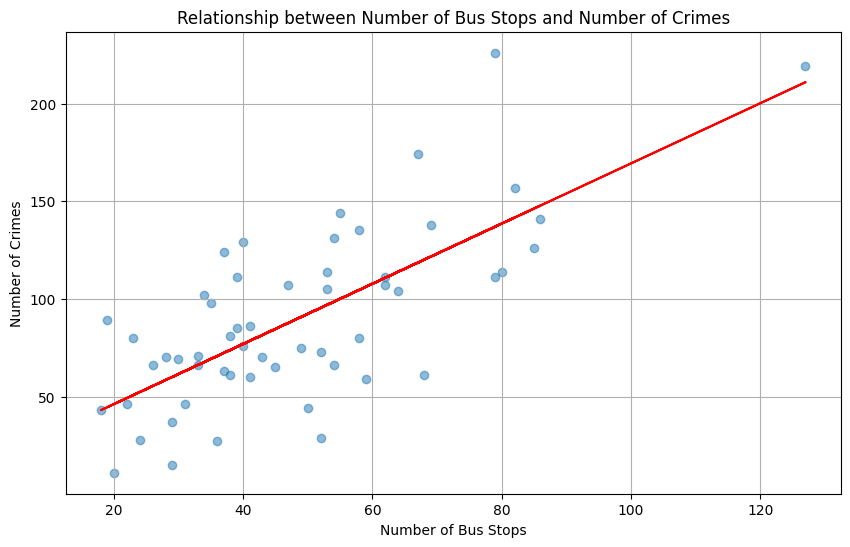

In [42]:
correlation, p_value = pearsonr(merged_df["Bus_stop_count"], merged_df["Crime_count"])
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df["Bus_stop_count"], merged_df["Crime_count"], alpha=0.5)
plt.xlabel("Number of Bus Stops")
plt.ylabel("Number of Crimes")

m, b = np.polyfit(merged_df["Bus_stop_count"], merged_df["Crime_count"], 1)
plt.plot(merged_df["Bus_stop_count"], m*merged_df["Bus_stop_count"] + b, color='red')

plt.title("Relationship between Number of Bus Stops and Number of Crimes")
plt.grid(True)
plt.show()

**Graph:** We can clearly see there is a positive correlation between the amount of bus stops and amount of crime showing that areas with more bus stops tend to have more crime.

**Summary**:
The bus stop dataset includes 2,654 entries, while the crime dataset contains a sample of 5,000 reported incidents in Baltimore. Although the crime records include detailed information such as date, type, and demographics, we focused on extracting the X and Y coordinates to map the data geographically. Both datasets were aggregated by Community Statistical Area (CSA), there are 55 CSAs in total. This allowed us to calculate the number of bus stops and crimes in each area. The p-value was less than 0.05 which rejects the null hypothesis and proves the statistically significant relationship between number of bus stops and crime.


**This proves that the presence of public transit stops may be associated with an increased risk of crimes.**



---



**Test 2: ANOVA Test (testing the relationship between the absentee rate and public transportation use across CSA's)**

For the second test, we want to find out if the average student absentee rate is different in neighborhoods with low, medium, or high levels of public transit usage. We'll use an ANOVA test (https://datatab.net/tutorial/anova) , which shows if there's a statistical difference between more than two groups. In our case, we have three!

**Null Hypothesis:** The mean absentee rates are equal across all levels of public transportation use.

**Alternative Hypothesis:** At least one level of public transportation use has a significantly different mean absentee rate (suggesting public transit access may impact absenteeism).

First, we categorize CSAs based on their percentage of public transportation usage (Low, Medium, High).

In [43]:
pubtran_filtered = pubtran_cleaned[pubtran_cleaned['Year'].isin([2021, 2022])]
pubtran_categorized = pubtran_filtered.copy()
bins = [2.2, 14, 26, 38.6]
labels = ['Low', 'Medium', 'High']
pubtran_categorized['Transit_Category'] = pd.cut(
    pubtran_categorized['Transit_Use_Pct'], bins=bins, labels=labels, include_lowest=True)

Then, we calculate the average absentee rate for each CSA based on data from 2021 and 2022.

In [44]:
# keep only absentee data from 2021 onward
absentee_cols = ['CSA2020', 'abshs21', 'abshs22']
absentees_filtered = absentees_df[absentee_cols].copy()

# calculate average
absentees_filtered['abs_avg'] = absentees_filtered[['abshs21', 'abshs22']].mean(axis=1)

We merge the transit and absentee data using the CSA column.

In [45]:
merged_df = pd.merge(pubtran_categorized, absentees_filtered, left_on='CSA', right_on='CSA2020')
merged_df = merged_df.drop(columns=['CSA2020'])
merged_df.head()

,CSA,Year,Transit_Use_Pct,Transit_Category,abshs21,abshs22,abs_avg
0,Allendale/Irvington/S. Hilton,2021,26.313357,High,61.035422,65.171504,63.103463
1,Beechfield/Ten Hills/West Hills,2021,12.706632,Low,50.923483,54.016620,52.470052
2,Belair-Edison,2021,19.275591,Medium,57.211538,62.374020,59.792779
3,Brooklyn/Curtis Bay/Hawkins Point,2021,15.582514,Medium,69.278034,66.973886,68.125960
4,Canton,2021,2.961227,Low,41.666667,46.666667,44.166667


Finally, we'll run the ANOVA test to compare the absentee averages between the three transit usage groups.

In [46]:
# run single ANOVA test using the averaged absenteeism rates
anova_result = stats.f_oneway(
    merged_df[merged_df['Transit_Category'] == 'Low']['abs_avg'],
    merged_df[merged_df['Transit_Category'] == 'Medium']['abs_avg'],
    merged_df[merged_df['Transit_Category'] == 'High']['abs_avg'])

# results
print("ANOVA Results: p-value =", anova_result.pvalue)

ANOVA Results: p-value = 5.336253035396955e-10


Let's visualize the result with a box plot to show the spread and central tendency of each group.

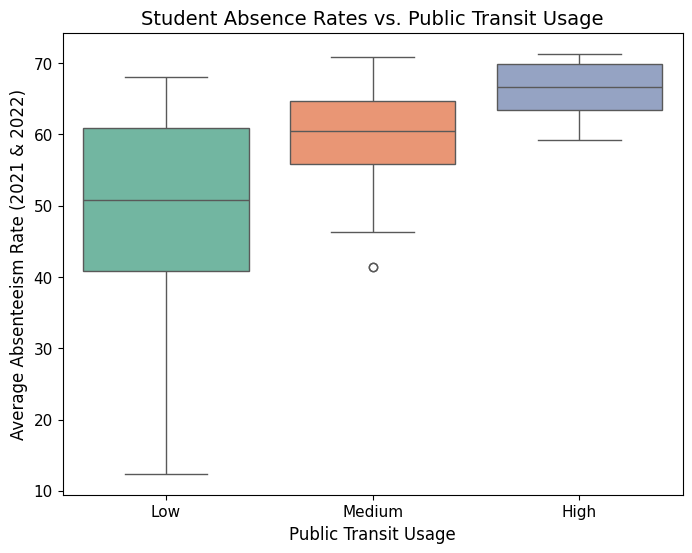

In [47]:
# create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_df["Transit_Category"], y=merged_df["abs_avg"],  hue=merged_df['Transit_Category'], palette='Set2')
plt.xlabel("Public Transit Usage", fontsize=12)
plt.ylabel("Average Absenteeism Rate (2021 & 2022)", fontsize=12)
plt.title("Student Absence Rates vs. Public Transit Usage", fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()


**Graph**: An outlier occurs in the Medium transit usage category, a 40% absenteeism rate, which may be skewing the analysis. However, overall higher public transit usage correlates with higher absentee rates.

**Summary**:
The dataset merges student absence information from absentees_df with public transportation usage data from pubtran_df for the years 2021 and 2022.
The absenteeism information contains two variables (abshs21 and abshs22), which denote absenteeism rates for high school students in each CSA, while the public transit information has attributes CSA, Year, and Transit_Use_Pct, showing the percentage of transit usage in each CSA. After filtering, merging, and cleaning, the merged_df contains 7 columns: CSA (geographic regions), Year,
Transit_Use_Pct (percentage of transit usage), Transit_Category (classifying transit use as Low, Medium, and High), abshs21 and abshs22 (absenteeism
rates for 2021 and 2022), and abs_avg (the mean absenteeism rate across both years). The ANOVA test was used to test if absenteeism significantly differs across three transit usage categories. None of the features appear to be over-represented in the dataset. The Transit_Category is correlated with Transit_Use_Pct. The p-value was less than 0.05, so we rejected the null hypothesis and concluded that there was a statisically significant relationship between the student absenses and public transportation usage.

**This shows that students who depend more on public transit may face structural barriers, like inconsistent service or long commute times, that contribute to higher absenteeism rates.**


---



**Test 3: Mann-Whitney U (testing if the distributions of the weapon vs no weapon groups and their distance from the closest bus stop are similar)**

In our third test,  we are trying to find a relation between the distance to a bus stop and whether or not the crime involved a weapon. Since the data may not be normally distributed, we use a Mann-Whitney U test, which compares the distribution of two independent groups (https://www.technologynetworks.com/informatics/articles/mann-whitney-u-test-assumptions-and-example-363425).

**Null Hypothesis:** The distributions of the weapon vs no weapon groups are similar.

**Alternative Hypothesis:** The distribution of one of the groups is bigger than the other.

 Let's drop any NaN values from Latitude and Longitude, and split the crime data into two groups: with weapon and without weapon.

In [48]:
from scipy.stats import mannwhitneyu
crime_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

crime_df_noweap = crime_df[crime_df['Weapon'] == 'NONE'].copy()
crime_df_weap = crime_df[crime_df['Weapon'] != 'NONE'].copy()

# get the coordinates
crime_noweap_coords = crime_df[crime_df['Weapon'] == 'NONE'][['Latitude', 'Longitude']].values
crime_weap_coords = crime_df[crime_df['Weapon'] != 'NONE'][['Latitude', 'Longitude']].values
bus_stops_coords = bus_stops_cleaned[['Y', 'X']].values

Then, we calculate the distance from each crime to the nearest bus stop using a custom distance function based on latitude and longitude.

In [49]:
#function to calculate the distance between where the crime happened and the closest bus stop
def distance_miles(crime_coords, bus_coords):
    crime_lat_rad = np.radians(crime_coords[:, 0])
    crime_lon_rad = np.radians(crime_coords[:, 1])
    bus_lat_rad = np.radians(bus_coords[:, 0])
    bus_lon_rad = np.radians(bus_coords[:, 1])
    dlat = crime_lat_rad[:, np.newaxis] - bus_lat_rad
    dlon = crime_lon_rad[:, np.newaxis] - bus_lon_rad
    a = np.sin(dlat / 2)**2 + np.cos(crime_lat_rad[:, np.newaxis]) * np.cos(bus_lat_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = 3958.8 * c
    min_distances = np.min(distance, axis=1)
    return min_distances

# calling function to calculate the distances
distances_noweap = distance_miles(crime_noweap_coords, bus_stops_coords)
distances_weap = distance_miles(crime_weap_coords, bus_stops_coords)

We'll add a new column for distances and compute the average.

In [50]:
#create a new column for distances
crime_df_noweap.loc[:, 'NearestBusStopDistance'] = distances_noweap
crime_df_weap.loc[:, 'NearestBusStopDistance'] = distances_weap

# get the average distance
average_distance_noweap = crime_df_noweap['NearestBusStopDistance'].mean()
average_distance_weap = crime_df_weap['NearestBusStopDistance'].mean()

Now we'll perform the Mann-Whitney U test to get the P-value.

In [51]:
# do the Mann-Whitney U test to get the P-value, which is 0.016006367901253496
u_stat, p_value = mannwhitneyu(crime_df_weap['NearestBusStopDistance'], crime_df_noweap['NearestBusStopDistance'], alternative='two-sided')
print("P-value with outlier =", p_value)
print("Average distance for no weapon crimes:", average_distance_noweap)
print("Average distance for weapon crimes:", average_distance_weap)

P-value with outlier = 0.00018351469758159616
Average distance for no weapon crimes: 0.09127691375697504
Average distance for weapon crimes: 0.08008275642293541


Finally, we'll take a look at the visualization by plotting a box plot with outlier.

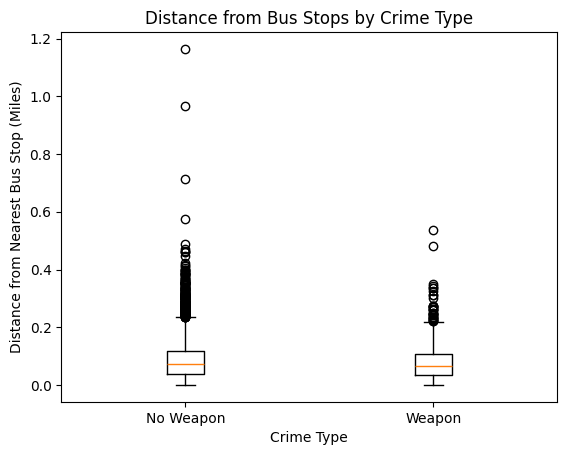

,RowID,CCNumber,CrimeDateTime,CrimeCode,Description,Weapon,Post,Gender,Age,Race,...,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents,x,y,geometry,NearestBusStopDistance
0,1,14I10336,2014-08-29 12:00:00,5A,BURGLARY,NONE,835.0,M,52.0,UNKNOWN,...,SHIPLEY HILL,39.288352,-76.660731,"(39.288352111548775,-76.660731200606335)",ROW/TOWNHOUSE-VAC,1,-76.660731,39.288352,POINT (-76.66073 39.28835),0.099616
1,2,14H13075,2014-08-29 23:45:00,4E,COMMON ASSAULT,NONE,515.0,F,24.0,BLACK_OR_AFRICAN_AMERICAN,...,WAVERLY,39.335514,-76.607897,"(39.335514488267016,-76.60789683728612)",ROW/TOWNHOUSE-OCC,1,-76.607897,39.335514,POINT (-76.6079 39.33551),0.094050
2,3,14H13066,2014-08-29 23:10:00,6G,LARCENY,NONE,114.0,F,44.0,BLACK_OR_AFRICAN_AMERICAN,...,DOWNTOWN,39.292553,-76.618255,"(39.292552601970897,-76.618254674552134)",BAR,1,-76.618255,39.292553,POINT (-76.61825 39.29255),0.025268
3,4,14I00593,2014-08-29 07:00:00,6J,LARCENY,NONE,732.0,NaN,NaN,UNKNOWN,...,PARKVIEW/WOODBROOK,39.316814,-76.649890,"(39.316813840390076,-76.649889876952656)",STREET,1,-76.649890,39.316814,POINT (-76.64989 39.31681),0.057450
4,5,14H13360,2014-08-29 23:30:00,6G,LARCENY,NONE,213.0,F,26.0,WHITE,...,FELLS POINT,39.280805,-76.594750,"(39.28080478810265,-76.594749640946659)",BAR,1,-76.594750,39.280805,POINT (-76.59475 39.2808),0.259417


In [52]:
# plot box plot with outlier
plt.boxplot([crime_df_noweap['NearestBusStopDistance'],
             crime_df_weap['NearestBusStopDistance']],
            tick_labels=['No Weapon', 'Weapon'])
plt.title('Distance from Bus Stops by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Distance from Nearest Bus Stop (Miles)')
plt.show()

# merge the datasets back to one
crime_df = pd.concat([crime_df_noweap, crime_df_weap])
crime_df.head()

**Graph:** The right whisker of the second box plot is shorter than that of the first, showing that crimes involving weapons tend to happen closer to bus stops than crimes without weapons despite the outliers.

**Summary:** The Baltimore-City-Crime dataset was split into 2 by whether or not a weapon was involved in the crime. This was done so that we could get the distance from where the crime happened from the nearest bus stop in the Bus_Stops database so that we could see if bus transportation availability played a role in the type of crime or severity of crimes that were committed. After finding the distances, we first calculated the average distance from the closest bus stop and saw that the average distance for crimes that involved no weapon was 80.39424549992856, but for crimes that involved a weapon it was 0.074958625016675. There was no way to assume that there was a normal distribution, so we ran the Mann-Whitney U test and it showed that there was a massive outlier for the no weapon group which skewed the data. The p-value was less than 0.05, rejecting the null hypothesis that the distributions of the weapon vs no weapon groups are similar.

**This suggests a potential safety concern in areas surrounding public transit access points.**


---



**Test 4: Chi-Squared Test to determine relationship between bus on-time performance and student absenteeism.**

In out last test,  we want to see if there's a connection between how often buses are on time and how often students are absent from school. We use a Chi-squared test, which helps us see if a relationship exists between two categorical variables.

More information on the test can be found here: https://www.investopedia.com/terms/c/chi-square-statistic.asp#:~:text=A%20chi%2Dsquare%20test%20is,question%20is%20a%20categorical%20variable

**Null Hypothesis:**
There is no relationship between bus on-time performance and student absenteeism.

**Alternative Hypothesis:**
There is a relationship between bus on-time performance and student absenteeism.

Let's first import our libraries and  extract the year from the bus performance dataset.

In [53]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

bus_perform_cleaned['Year'] = bus_perform_cleaned['Date'].dt.year

We now calculate the average on-time performance for each year. This is done by grouping the data by the year and calculating the mean of the On-Time column.

In [54]:
annual_bus_performance = bus_perform_cleaned.groupby('Year')['On-Time'].mean().reset_index()
annual_bus_performance.rename(columns={'On-Time': 'Annual_On_Time_Pct'}, inplace=True)

Next, we reshape the absenteeism dataset from a wide format to a long format using pd.melt. This step allows us to have one row for each year's absenteeism rate for each geographic region.

In [55]:
absentee_long = absentees_df.melt(
    id_vars=['CSA2020'],
    value_vars=['abshs21', 'abshs22'],
    var_name='Year',
    value_name='AbsenceRate'
)

 Let's clean up the year labels by converting them to integers and adjusting the year format. We'll also merge the absenteeism dataset with the bus performance dataset based on the Year column to create a combined dataset.

In [56]:
# Clean year labels
absentee_long['Year'] = absentee_long['Year'].str.extract(r'(\d+)').astype(int) + 2000
absentee_long.rename(columns={'CSA2020': 'CSA'}, inplace=True)
# Merge absentee data with bus performance
merged_data = pd.merge(
    absentee_long,
    annual_bus_performance,
    on='Year',
    how='left'
)

To prepare for the Chi-Squared test, we categorize the 'Annual_On_Time_Pct' and 'AbsenceRate' variables into high and low categories. We use the median as the cutoff.

In [57]:
# Categorize variables
merged_data['On_Time_Category'] = np.where(
    merged_data['Annual_On_Time_Pct'] >= merged_data['Annual_On_Time_Pct'].median(),
    'High On_Time',
    'Low On_Time'
)

merged_data['Absence_Category'] = np.where(
    merged_data['AbsenceRate'] >= merged_data['AbsenceRate'].median(),
    'High_Absent',
    'Low_Absent'
)
contingency_table = pd.crosstab(
    merged_data['On_Time_Category'],
    merged_data['Absence_Category']
)

We now create a contingency table to observe the frequency distribution of the two categorical variables and apply the Chi-Squared test on the table to determine if there is a statistically significant relationship.

In [58]:
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Squared Statistic: {chi2:.2f}")
print(f"P-value: {p_value:.4f}")

Chi-Squared Statistic: 0.58
P-value: 0.4456


Let's also plot our visualization using a bar graph!

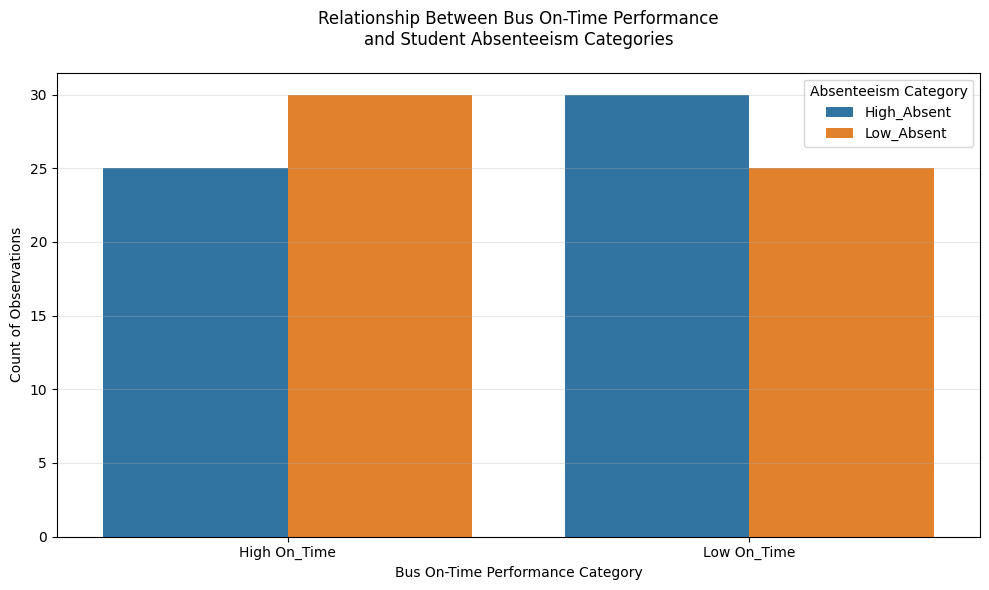

In [59]:
# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data,
              x='On_Time_Category',
              hue='Absence_Category',
              palette=['#1f77b4', '#ff7f0e'])

plt.title('Relationship Between Bus On-Time Performance\nand Student Absenteeism Categories', pad=20)
plt.xlabel('Bus On-Time Performance Category')
plt.ylabel('Count of Observations')
plt.legend(title='Absenteeism Category')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

**Note:** The count of observations represents the number of CSA regions (Community Statistical Areas) that fall into each combination of bus on-time performance (high or low) and absenteeism level (high or low).

**Graph:** The x-axis represents areas with below and above average bus punctuality. In the High On-Time group, approximately 25 community statistical areas (CSAs) experienced high absenteeism, while 30 experienced low absenteeism. In the Low On-Time group, around 30 CSAs experienced high absenteeism and 25 experienced low absenteeism.

**Summary:** The relationship between Baltimore public transit bus performance and student absentee rates is being investigated by merging datasets, categorizing variables, and conducting a chi-squared test. The bus performace data is being processed to extract the year and calculate annual on-time percentages. The absenteeism data is reformatted and standardized. The datasets are merged, with both being classified into "High" and "Low" categories based on median values. A chi-squared test was used to determine if there was a statistically significant relationship between bus performance and students absenteeism rates. The dataset includes features like On-Time, AbsenceRate, CSA, and Year, with categorical transformations applied. Extreme values in absenteeism or bus delays can act as outliers. In the end, with a p-value > 0.05 we came to the conclusion that there is no statistically significant relationship with bus on-time performance and student absenteeism. The count of observations is balanced across the categories. The graph shows balanced distributions which suggests no skewness.


**This tells us that bus on-time performance may not be a significant factor influencing absenteeism in these areas.**


## Machine Learning Implementation

Now we are doing machine learning which is a way to teach computers how to discern patterns when provided data, without being explicity told what the pattern or rule is.

See in Tradtional Programing the programer would define the set of rules and the machine would return the output the programmer wants.

In machine learning we don't tell the machine how to do something with the data ,but rather learn and make predictions without being too hands on.

![robot](https://miro.medium.com/v2/resize:fit:1000/1*1C3GnoY-FzhqzL0MzTlWyQ.gif)

There are several different types of machine learning models and much to learn.

Here is a great resource for more background: https://www.geeksforgeeks.org/machine-learning-models/

To see the impact of public transportation access on student absenteeism, we used linear regression to model the relationship between transit use percentage and average student absentee rate. Linear regression is a technique used in statistics and machine learning to find the relationship between variables, and it is a supervised learning algorithm. A  straight line with a slope represents the linear regression model. Some benefits of linear regression include simple implementation, scalability, and interpretability. This problem is predictive, not classification so we used linear regression.

Firs thing is adding the necessary libraries like always. The library we need the most is sklean.linear_model which contains the LinearRegression class we will be suing to train the model

In [60]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

Next step is to prepare the data for training.

- X: input feature containing the number of people using public transport
- y: Our target variable which is mapping the average absences rate for that neighborhood

The next model = LinearRegression creates a model and the .fit trains the model with our provided data. Basically finds the "best fit" of y from X.

Then the slope and intercept tells us how absences changes when transit use goes up.

In [61]:
# Prepare data
X = merged_df[['Transit_Use_Pct']]
y = merged_df['abs_avg']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Model coefficients
slope = model.coef_[0]
intercept = model.intercept_

After training the model we can now have it try and make predictions and visualize it.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


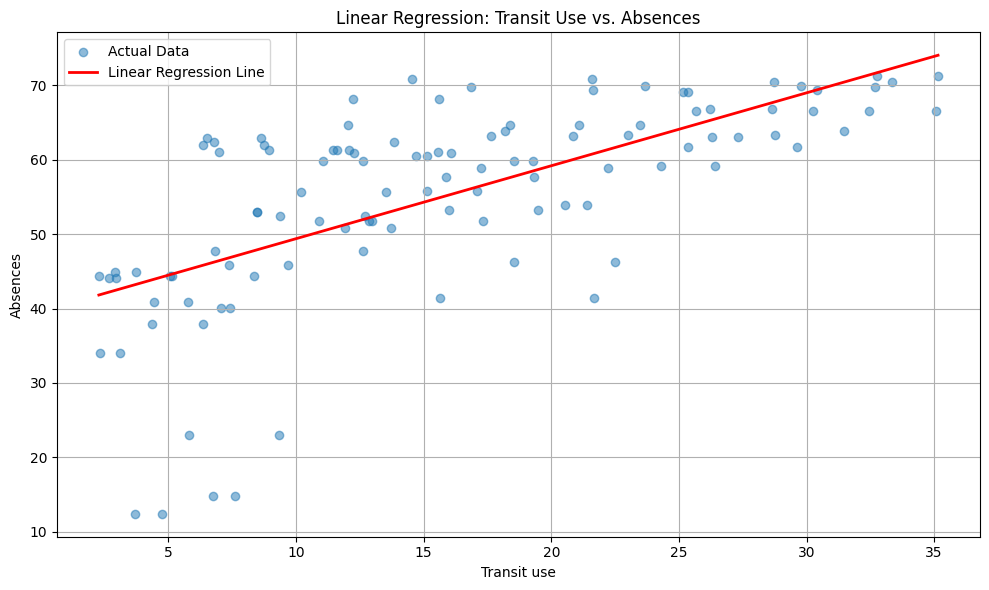

In [62]:
# Predict values for regression line
x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_preds = model.predict(x_vals)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Actual Data')
plt.plot(x_vals, y_preds, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel("Transit use")
plt.ylabel("Absences")
plt.title("Linear Regression: Transit Use vs. Absences")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

 By training a model on these variables, we were able to exactly see the strength of the relationships between public transportation usage and student absence rates.

 As we see above the positive slope of the line shows that as transit use increases, absences also surprisingly start to increase. This is surprising because we would expect higher transit use to correlate with lower student absentee rates.

More info on Linear Regression: https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-linear-regression/

## Conclusion

The goal of this project was to look at Baltimore City Schools that do not provide school buses to their students, and investigate transit accessibility for students, crime rates around those areas, and see how it affects students' education.
Using data sets from Baltimore's open data portal, we followed a full data science pipeline: from data cleaning to organizing information, creating visuals, and interpreting findings. The goal was to answer these three questions:

1. Does limited access to public transportation increase the likelihood of students being absent or late?
2. Are students in more concentrated, crime-related areas more likely to miss school?
3. How does transportation and safety factor into predicting attendance?

For the first question, our spatial analysis for bus stop locations and school zones led us to the insight that limited transit availability is correlated with higher absenteeism in schools. We were looking at bus stop density and proximity to schools. We found that fewer stops means more absences. We concluded that worse access to buses leads to more absences.

For the second question, when overlaying school locations with crime density maps, we found that schools in high-crime neighborhoods grouped by Baltimore City's CSAs, experience significantly higher absence rates. This showed that student safety concerns do play a role on the likelihood of students to be absent or late.

Finally, for the third question, we built a linear regression model to predict absentee rates based on public transit usage. Surprisingly, our model showed a positive correlation. That means as transit usage increases, absences also increased. For the linear regression model, absenteeism is modeled as a function of percentage of students using public transportation.

Although the results from the linear regression model at first glance might look like it contradicts our findings from the first question, it actually helps us gain a deeper insight, which is that high usage of public transit might reflect necessity rather than quality access. For example, let's say neighborhood A has low transit usage since many students' families may have cars or live really close to the school. In neighborhood B, let's say there is high transit use due to the fact that students have no option but to take the public bus, which are slow, maybe far away, and unsafe. Neighborhood B might have more transit usage, but that could still mean lower attendance since they have to depend on this flawed system.

The key insight is that access to transportation and safety do play a role in students' attendance in school in the Baltimore city area.



![transport](https://media0.giphy.com/media/vonSr61Q6zmWNIxxnb/giphy.gif?cid=6c09b952ejzt8rooze8s2s8pndy2fmdfpu8my48u15squ2sv&ep=v1_videos_search&rid=giphy.gif&ct=v)